# S&P 500 Dataset
The observations for the S&P 500 represent the daily index value at market close. The market typically closes at 4 PM ET, except for holidays when it sometimes closes early.

### Source:
[https://fred.stlouisfed.org/series/SP500](https://fred.stlouisfed.org/series/SP500)

### Problem Definition:
In this case, the problem we will be exploring is **regression**.

This is because we're going to be using a number of different **features** (pieces of information) about the S&P 500 to predict the price in the feature.

### Records:
The dataset contains a total of 2517 cases.

### Features:
* **observation_date**: the date observed.
* **SP500**: represent the daily index value at market close.
* **MA5**: is the average closing price of 5 days.
* **MA21**: is the average closing price of 21 days.
* **diff**: is the close price difference between today and yesterday.

## Preparing the tools

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Getting data ready

In [ ]:
#@title Default title text
sp500 = pd.read_csv('https://raw.githubusercontent.com/mohammad-amini-nasab/DataScience-practice/main/s1-e04-workshop/SP500.csv')
sp500

,observation_date,SP500,MA5,MA21,diff
0,2012-01-09,1280.70,NaN,NaN,NaN
1,2012-01-10,1292.08,NaN,NaN,11.38
2,2012-01-11,1292.48,NaN,NaN,0.40
3,2012-01-12,1295.50,NaN,NaN,3.02
4,2012-01-13,1289.09,NaN,NaN,-6.41
...,...,...,...,...,...
2512,2021-12-31,4766.18,4775.02,4670.42,-12.55
2513,2022-01-03,4796.56,4783.10,4682.47,30.38
2514,2022-01-04,4793.54,4784.18,4692.92,-3.02
2515,2022-01-05,4700.58,4785.61,4705.07,-92.96


information about data

In [ ]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2517 non-null   object 
 1   SP500             2517 non-null   float64
 2   MA5               2512 non-null   float64
 3   MA21              2496 non-null   float64
 4   diff              2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 98.4+ KB


In [ ]:
sp500.describe()

,SP500,MA5,MA21,diff
count,2517.000000,2512.000000,2496.000000,2516.000000
mean,2477.591609,2475.843049,2472.369235,1.357452
std,829.339776,825.484632,814.531096,27.433812
min,1278.040000,1289.970000,1311.690000,-324.890000
25%,1912.530000,1912.922500,1930.835000,-7.062500
50%,2268.900000,2269.200000,2265.705000,1.525000
75%,2889.670000,2893.185000,2891.630000,11.672500
max,4796.560000,4785.610000,4710.260000,230.380000


### Preprocessing

#### Deal with null values

There are 27 null data in column *MA5* and *MA21* and *diff*.\
Due to the large amount of data, 27 null data can be deleted.

In [ ]:
sp500.isna().sum()

observation_date     0
SP500                0
MA5                  5
MA21                21
diff                 1
dtype: int64

In [ ]:
sp500.dropna(inplace=True)

#### Deal with *diff*

Values over 100 were considered 100 and below -100 were considered -100.

In [ ]:
def diff_interval(value):
  if value > 100:
    return 100
  if value < -100:
    return -100
  return value

In [ ]:
sp500['diff'] = sp500['diff'].apply(diff_interval)

#### Finding outliers

In [ ]:
data = sp500.drop(['observation_date'], axis=1)

In [ ]:
def outlier_percentage(data):
  for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column SP500 outliers = 4.77%
Column MA5 outliers = 4.69%
Column MA21 outliers = 4.65%
Column diff outliers = 10.10%


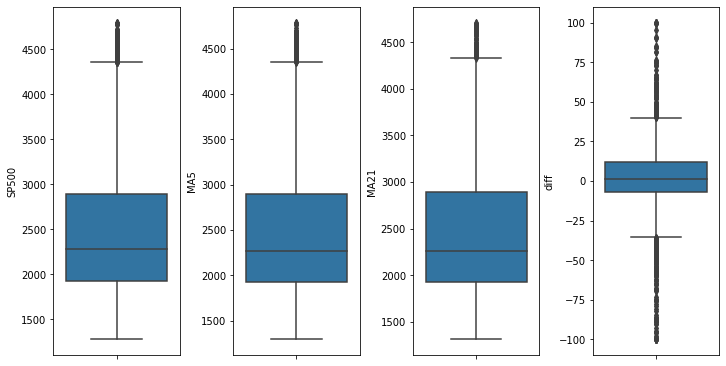

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(10, 5))
axs = axs.flatten()
for i, (k, v) in enumerate(data.items()):
  sns.boxplot(y=k, data=data, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

outlier_percentage(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

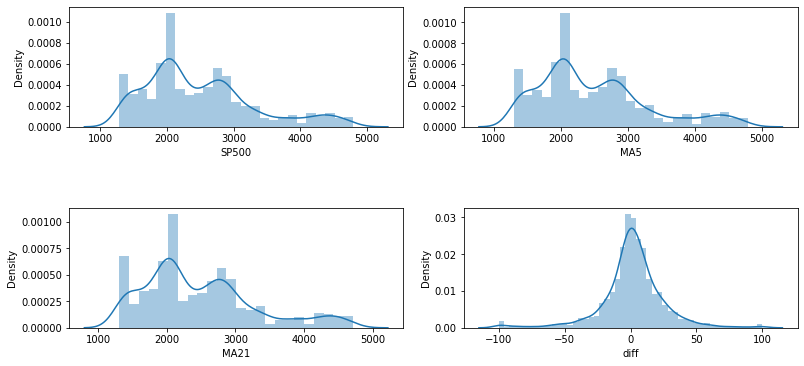

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(11, 5))
axs = axs.flatten()
for i, (k, v) in enumerate(data.items()):
  sns.distplot(v, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)